# LINEAR REGRESSION IN PYTHON

EXAMP: we need to predict the profit that company makes if we wanna know is it ok to invest in that company

based on company expenses

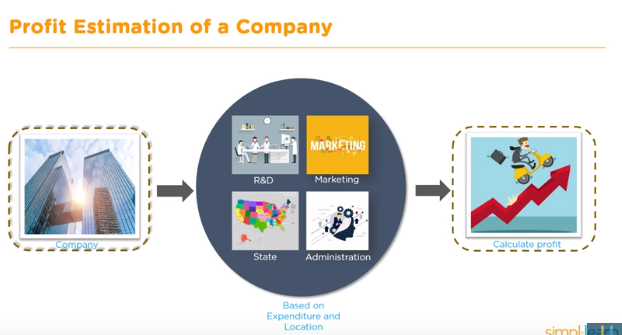

In [1]:
from IPython.display import Image
Image(filename='Pictures/M56.PNG',width=600,height=600)

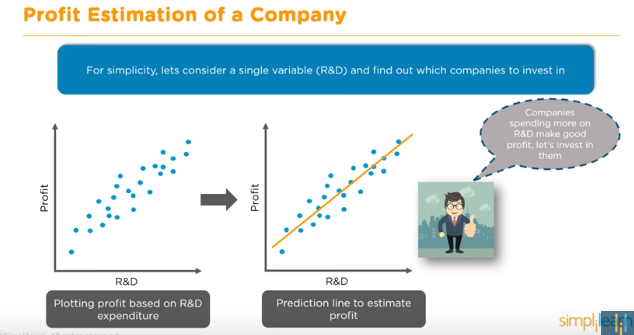

In [2]:
Image(filename='Pictures/M57.PNG',width=600,height=600)

Diff between independent var and dependent var

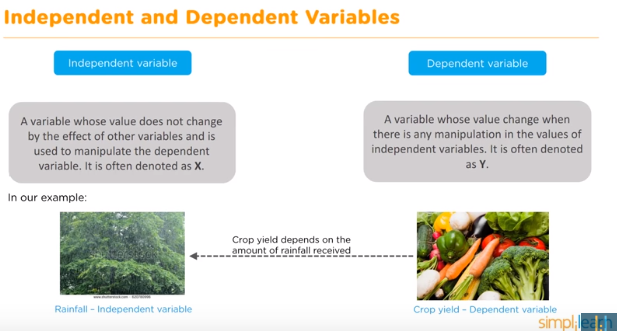

In [3]:
Image(filename='Pictures/M58.PNG',width=600,height=600)

SUPERVISED LEARNING - REGRESSION - Simple Linear reg, Multiple Liner Reg.,Polynomial Lin Reg

Applications for LR :
1. ECONOMIC GROWTH - GDP
2. PRODUCT PRICE
3. HOUSING SALES
5. SCORE PREDICTION

LR - predict relationship between indep.and dep. var

y=mx+c

y---> dependet var

x---> indep. var

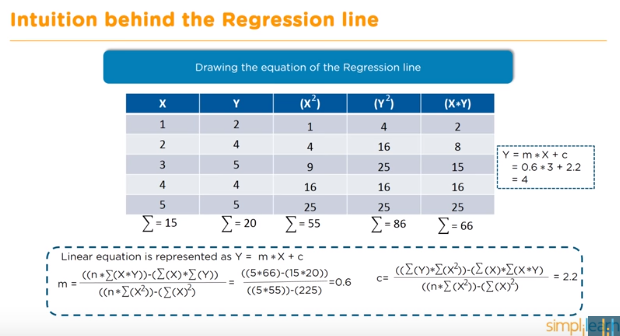

In [4]:
Image(filename='Pictures/M59.PNG',width=600,height=600)

MULTIPLE LINEAR REGRESSION



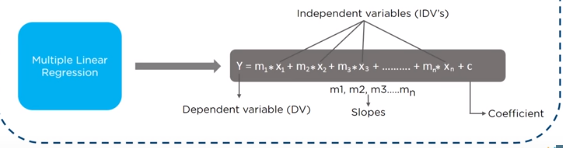

In [6]:
Image(filename='Pictures/M60.PNG',width=600,height=600)

Example:

Predicting the profit of the company

so we don't have only one attribute like R&D Spend, we also have Administration, Marketing Spend, State

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

http://archive.ics.uci.edu/ml/datasets.html?area=&att=&format=&numAtt=&numIns=&sort=attup&task=reg&type=&view=table

great page for datasets for practice!!!

In [9]:
companies=pd.read_csv('Data/1000_Companies.csv')

In [10]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


x var --------> 0-3 Stupaca

y var --------> zadnji stupac

In [17]:
x=companies.iloc[:, :-1].values
y=companies.iloc[:,4].values

In [18]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

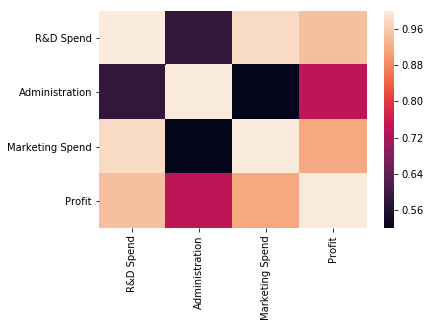

In [19]:
sns.heatmap(companies.corr())

conections - R&D MARKETING SPEND

PROFIT - MARKETING SPEND AND R&D SPEND

In [20]:
#encoding categorical data

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
#on the header state - newyork need to be transformed into numbers

In [23]:
labelencoder=LabelEncoder()
#the only column we wanna transform is the third one
x[:,3]=labelencoder.fit_transform(x[:,3])
#instead of word new york it will be put some number 0,1,2,3...

onehotencoder= OneHotEncoder(categorical_features=[3])
x = onehotencoder.fit_transform(x).toarray()

In [24]:
print(x[0])

[0.000000e+00 0.000000e+00 1.000000e+00 1.653492e+05 1.368978e+05
 4.717841e+05]


Avoiding Dummy variable Top

In [26]:
#encoder created two columns
#when we run one hot encoder computer added aditional column to the var x
#now we wanna remove that column!!!!!!!!!!

In [28]:
x = x[: ,1:]

Spliting data into train and test set

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Creating multiple lin. reg model

In [30]:
from sklearn.linear_model import LinearRegression
mreg=LinearRegression()
mreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predicitng

In [31]:
y_pred=mreg.predict(x_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836972, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.22936439,  91473.37719686,
       164597.05380606,  53222.82667401,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.8597105 , 177513.91053062,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396144,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475224,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130747, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.25779409, 107724.34331255,  50194.54176913,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671743, 131137.87699644, 184880.70924516, 174609.0826688 ,
        93745.66352059,  

Calculating the coefficients

In [38]:
print(mreg.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [39]:
#calculating the intercept
print(mreg.intercept_)

-51035.22972402591


Evaluating

In [42]:
from sklearn.metrics import r2_score

In [43]:
#calculating the R squared value - matrices can't be done because it is mutiple reg

In [44]:
r2_score(y_test,y_pred)

0.9112695892268863

In [45]:
#good model!!